In [1]:
import numpy as np
import pandas as pd

In [2]:
employee_df = pd.read_excel('employee_satisfaction_evaluation.xlsx')
hr_df = pd.read_csv('hr_data.csv')

In [3]:
employee_df.head()

EMPLOYEE #  satisfaction_level  last_evaluation
0        1003                0.38             0.53
1        1005                0.80             0.86
2        1486                0.11             0.88
3        1038                0.72             0.87
4        1057                0.37             0.52

In [4]:
hr_df.head()

employee_id  number_project  average_montly_hours  time_spend_company  \
0         1003               2                   157                   3   
1         1005               5                   262                   6   
2         1486               7                   272                   4   
3         1038               5                   223                   5   
4         1057               2                   159                   3   

   Work_accident  left  promotion_last_5years department  salary  
0              0     1                      0      sales     low  
1              0     1                      0      sales  medium  
2              0     1                      0      sales  medium  
3              0     1                      0      sales     low  
4              0     1                      0      sales     low

In [5]:
employee_df.shape

(14999, 3)

In [6]:
hr_df.shape

(14999, 9)

In [7]:
employee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   EMPLOYEE #          14999 non-null  int64  
 1   satisfaction_level  14972 non-null  float64
 2   last_evaluation     14972 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 351.7 KB


In [8]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   employee_id            14999 non-null  int64 
 1   number_project         14999 non-null  int64 
 2   average_montly_hours   14999 non-null  int64 
 3   time_spend_company     14999 non-null  int64 
 4   Work_accident          14999 non-null  int64 
 5   left                   14999 non-null  int64 
 6   promotion_last_5years  14999 non-null  int64 
 7   department             14999 non-null  object
 8   salary                 14999 non-null  object
dtypes: int64(7), object(2)
memory usage: 1.0+ MB


In [9]:
hr_df['department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [10]:
hr_df['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [11]:
main_df = hr_df.set_index('employee_id').join(employee_df.set_index('EMPLOYEE #'))

In [12]:
main_df.head()

number_project  average_montly_hours  time_spend_company  \
employee_id                                                             
1003                      2                   157                   3   
1005                      5                   262                   6   
1486                      7                   272                   4   
1038                      5                   223                   5   
1057                      2                   159                   3   

             Work_accident  left  promotion_last_5years department  salary  \
employee_id                                                                  
1003                     0     1                      0      sales     low   
1005                     0     1                      0      sales  medium   
1486                     0     1                      0      sales  medium   
1038                     0     1                      0      sales     low   
1057                     0     1                      0      sales     low   

             satisfaction_level  last_evaluation  
employee_id                                       
1003                       0.38             0.53  
1005                       0.80             0.86  
1486                       0.11             0.88  
1038                       0.72             0.87  
1057                       0.37             0.52

In [13]:
main_df.shape

(14999, 10)

In [14]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14999 entries, 1003 to 87684
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   number_project         14999 non-null  int64  
 1   average_montly_hours   14999 non-null  int64  
 2   time_spend_company     14999 non-null  int64  
 3   Work_accident          14999 non-null  int64  
 4   left                   14999 non-null  int64  
 5   promotion_last_5years  14999 non-null  int64  
 6   department             14999 non-null  object 
 7   salary                 14999 non-null  object 
 8   satisfaction_level     14972 non-null  float64
 9   last_evaluation        14972 non-null  float64
dtypes: float64(2), int64(6), object(2)
memory usage: 1.9+ MB


In [15]:
main_df.isnull().any()

number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
department               False
salary                   False
satisfaction_level        True
last_evaluation           True
dtype: bool

In [16]:
main_df[main_df.isnull().any(axis=1)]

number_project  average_montly_hours  time_spend_company  \
employee_id                                                             
3794                      2                   160                   3   
1140                      5                   262                   5   
1230                      2                   140                   3   
1340                      2                   132                   3   
22316                     2                   149                   3   
1581                      2                   143                   3   
17376                     2                   148                   3   
1739                      4                   158                   4   
1847                      2                   129                   3   
32923                     4                   164                   2   
2160                      4                   226                   6   
3150                      4                   262                   6   
3250                      4                   296                   2   
3405                      5                   275                   5   
78130                     3                   180                   4   
3635                      5                   229                   5   
3755                      5                   245                   5   
4150                      5                   237                   5   
43615                     4                   276                   5   
42185                     5                   264                   5   
11895                     4                   225                   5   
14170                     3                   115                   2   
16445                     5                   149                   2   
18980                     5                   186                   2   
21580                     3                   263                   2   
22555                     4                   214                   3   
24505                     3                   192                   3   
27950                     3                   253                   3   
29640                     4                   180                   4   
38090                     5                   166                   2   
41535                     4                   150                   3   
44460                     4                   264                   3   
50960                     4                   167                   3   
55770                     4                   270                   3   
58630                     5                   252                   3   
62595                     4                   165                   3   
64350                     5                   233                   3   
20215                     3                   192                   7   
70005                     3                   148                   3   
72475                     5                   257                   5   
74880                     3                   136                   2   
78780                     3                   207                   7   
81315                     3                   133                   3   

             Work_accident  left  promotion_last_5years   department  salary  \
employee_id                                                                    
3794                     1     1                      1        sales     low   
1140                     0     1                      0        sales     low   
1230                     0     1                      0           hr     low   
1340                     0     1                      0      support     low   
22316                    0     1                      0  product_mng    high   
1581                     0     1                      0        sales     low   
17376                    0     1                      0   accounting  medium   
1739   

In [17]:
main_df.describe()

number_project  average_montly_hours  time_spend_company  \
count    14999.000000          14999.000000        14999.000000   
mean         3.803054            201.050337            3.498233   
std          1.232592             49.943099            1.460136   
min          2.000000             96.000000            2.000000   
25%          3.000000            156.000000            3.000000   
50%          4.000000            200.000000            3.000000   
75%          5.000000            245.000000            4.000000   
max          7.000000            310.000000           10.000000   

       Work_accident          left  promotion_last_5years  satisfaction_level  \
count   14999.000000  14999.000000           14999.000000        14972.000000   
mean        0.144610      0.238083               0.021268            0.612830   
std         0.351719      0.425924               0.144281            0.248714   
min         0.000000      0.000000               0.000000            0.090000   
25%         0.000000      0.000000               0.000000            0.440000   
50%         0.000000      0.000000               0.000000            0.640000   
75%         0.000000      0.000000               0.000000            0.820000   
max         1.000000      1.000000               1.000000            1.000000   

       last_evaluation  
count     14972.000000  
mean          0.716125  
std           0.171138  
min           0.360000  
25%           0.560000  
50%           0.720000  
75%           0.870000  
max           1.000000

In [18]:
main_df.fillna(main_df.mean(),inplace=True)

In [19]:
main_df[main_df.isnull().any(axis=1)]

Empty DataFrame
Columns: [number_project, average_montly_hours, time_spend_company, Work_accident, left, promotion_last_5years, department, salary, satisfaction_level, last_evaluation]
Index: []

In [20]:
main_df.describe()

number_project  average_montly_hours  time_spend_company  \
count    14999.000000          14999.000000        14999.000000   
mean         3.803054            201.050337            3.498233   
std          1.232592             49.943099            1.460136   
min          2.000000             96.000000            2.000000   
25%          3.000000            156.000000            3.000000   
50%          4.000000            200.000000            3.000000   
75%          5.000000            245.000000            4.000000   
max          7.000000            310.000000           10.000000   

       Work_accident          left  promotion_last_5years  satisfaction_level  \
count   14999.000000  14999.000000           14999.000000         14999.00000   
mean        0.144610      0.238083               0.021268             0.61283   
std         0.351719      0.425924               0.144281             0.24849   
min         0.000000      0.000000               0.000000             0.09000   
25%         0.000000      0.000000               0.000000             0.44000   
50%         0.000000      0.000000               0.000000             0.64000   
75%         0.000000      0.000000               0.000000             0.82000   
max         1.000000      1.000000               1.000000             1.00000   

       last_evaluation  
count     14999.000000  
mean          0.716125  
std           0.170984  
min           0.360000  
25%           0.560000  
50%           0.720000  
75%           0.870000  
max           1.000000

In [21]:
main_df=main_df.reset_index()

In [22]:
main_df.drop(columns='employee_id',inplace=True)

In [23]:
main_df.head()

number_project  average_montly_hours  time_spend_company  Work_accident  \
0               2                   157                   3              0   
1               5                   262                   6              0   
2               7                   272                   4              0   
3               5                   223                   5              0   
4               2                   159                   3              0   

   left  promotion_last_5years department  salary  satisfaction_level  \
0     1                      0      sales     low                0.38   
1     1                      0      sales  medium                0.80   
2     1                      0      sales  medium                0.11   
3     1                      0      sales     low                0.72   
4     1                      0      sales     low                0.37   

   last_evaluation  
0             0.53  
1             0.86  
2             0.88  
3             0.87  
4             0.52

In [24]:
main_df.groupby('department').sum()

number_project  average_montly_hours  time_spend_company  \
department                                                              
IT                     4683                248119                4256   
RandD                  3033                158030                2650   
accounting             2934                154292                2702   
hr                     2701                146828                2480   
management             2432                126787                2711   
marketing              3164                171073                3063   
product_mng            3434                180369                3135   
sales                 15634                831773               14631   
support                8479                447490                7563   
technical             10548                550793                9279   

             Work_accident  left  promotion_last_5years  satisfaction_level  \
department                                                                    
IT                     164   273                      3           758.17283   
RandD                  134   121                     27           487.80000   
accounting              96   204                     14           446.68283   
hr                      89   215                     15           442.53566   
management             103    91                     69           391.76566   
marketing              138   203                     43           530.62283   
product_mng            132   198                      0           559.19566   
sales                  587  1014                    100          2543.77981   
support                345   555                     20          1377.90849   
technical              381   697                     28          1653.37264   

             last_evaluation  
department                    
IT                879.452250  
RandD             560.446125  
accounting        550.706125  
hr                524.006125  
management        456.234499  
marketing         613.946125  
product_mng       644.662250  
sales            2938.236749  
support          1611.534499  
technical        1961.930624

In [25]:
main_df.groupby('department').mean()

number_project  average_montly_hours  time_spend_company  \
department                                                              
IT                 3.816626            202.215974            3.468623   
RandD              3.853875            200.800508            3.367217   
accounting         3.825293            201.162973            3.522816   
hr                 3.654939            198.684709            3.355886   
management         3.860317            201.249206            4.303175   
marketing          3.687646            199.385781            3.569930   
product_mng        3.807095            199.965632            3.475610   
sales              3.776329            200.911353            3.534058   
support            3.803948            200.758188            3.393001   
technical          3.877941            202.497426            3.411397   

             Work_accident      left  promotion_last_5years  \
department                                                    
IT                0.133659  0.222494               0.002445   
RandD             0.170267  0.153748               0.034307   
accounting        0.125163  0.265971               0.018253   
hr                0.120433  0.290934               0.020298   
management        0.163492  0.144444               0.109524   
marketing         0.160839  0.236597               0.050117   
product_mng       0.146341  0.219512               0.000000   
sales             0.141787  0.244928               0.024155   
support           0.154778  0.248991               0.008973   
technical         0.140074  0.256250               0.010294   

             satisfaction_level  last_evaluation  
department                                        
IT                     0.617908         0.716750  
RandD                  0.619822         0.712130  
accounting             0.582377         0.718000  
hr                     0.598830         0.709075  
management             0.621850         0.724182  
marketing              0.618442         0.715555  
product_mng            0.619951         0.714703  
sales                  0.614440         0.709719  
support                0.618173         0.722985  
technical              0.607858         0.721298

In [27]:
main_df['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

No handles with labels found to put in legend.


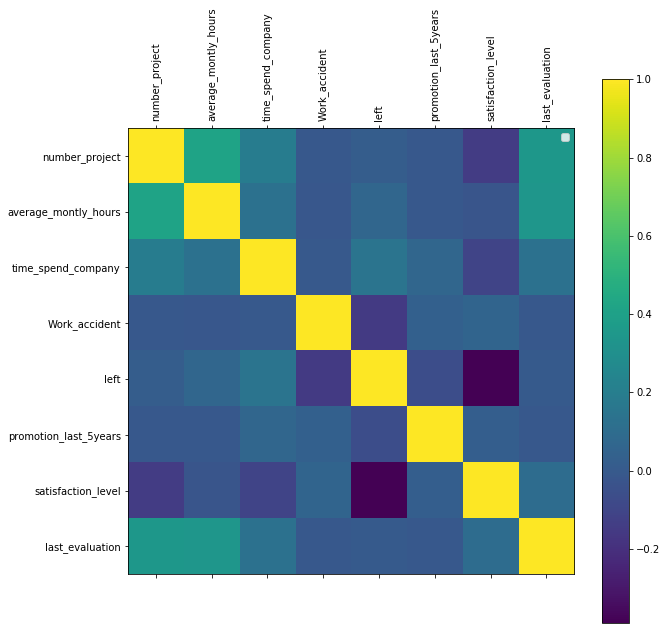

In [30]:
def plot_corr(df,size=10):
    
    corr=df.corr()
    fig,ax=plt.subplots(figsize=(size,size))
    ax.legend()
    cax=ax.matshow(corr)
    fig.colorbar(cax)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical')
    plt.yticks(range(len(corr.columns)), corr.columns)
    

plot_corr(main_df)

<BarContainer object of 14999 artists>

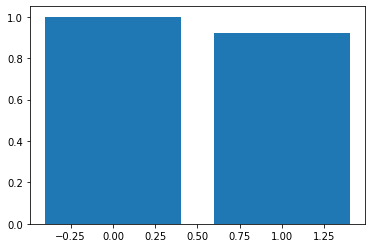

In [31]:
plt.bar(x=main_df['left'],height=main_df['satisfaction_level'])

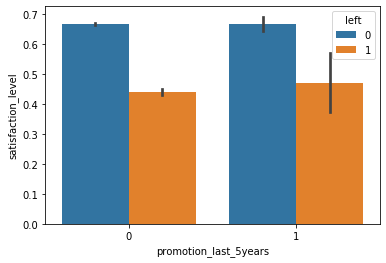

In [32]:
sns.barplot(x='promotion_last_5years',y='satisfaction_level',data=main_df,hue='left')

RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

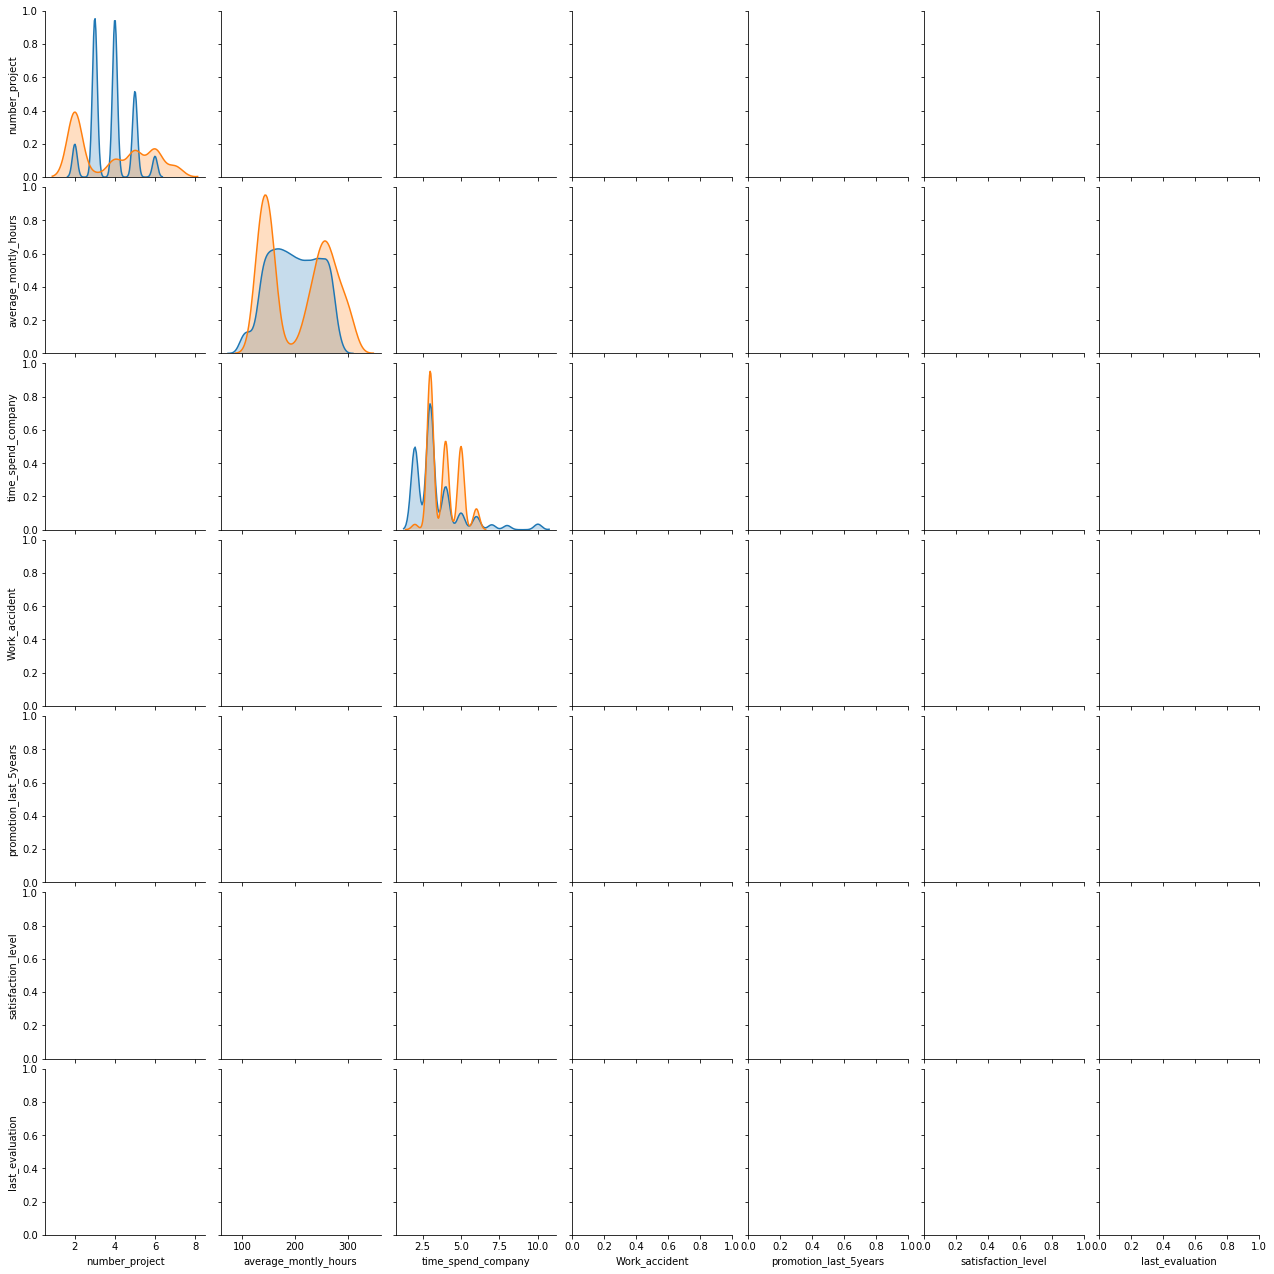

In [35]:
sns.pairplot(main_df,hue='left')

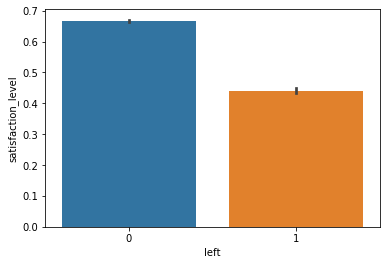

In [34]:
sns.barplot(x='left',y='satisfaction_level',data=main_df)

In [36]:
y=main_df[['department','salary']]

In [37]:
y

department  salary
0          sales     low
1          sales  medium
2          sales  medium
3          sales     low
4          sales     low
...          ...     ...
14994    support     low
14995    support     low
14996    support     low
14997    support     low
14998    support     low

[14999 rows x 2 columns]

In [38]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

k=le.fit_transform(main_df['salary'])

In [39]:
k

array([1, 2, 2, ..., 1, 1, 1])

In [40]:
main_df['salary_num']=k

In [41]:
main_df

number_project  average_montly_hours  time_spend_company  \
0                   2                   157                   3   
1                   5                   262                   6   
2                   7                   272                   4   
3                   5                   223                   5   
4                   2                   159                   3   
...               ...                   ...                 ...   
14994               2                   151                   3   
14995               2                   160                   3   
14996               2                   143                   3   
14997               6                   280                   4   
14998               2                   158                   3   

       Work_accident  left  promotion_last_5years department  salary  \
0                  0     1                      0      sales     low   
1                  0     1                      0      sales  medium   
2                  0     1                      0      sales  medium   
3                  0     1                      0      sales     low   
4                  0     1                      0      sales     low   
...              ...   ...                    ...        ...     ...   
14994              0     1                      0    support     low   
14995              0     1                      0    support     low   
14996              0     1                      0    support     low   
14997              0     1                      0    support     low   
14998              0     1                      0    support     low   

       satisfaction_level  last_evaluation  salary_num  
0                    0.38             0.53           1  
1                    0.80             0.86           2  
2                    0.11             0.88           2  
3                    0.72             0.87           1  
4                    0.37             0.52           1  
...                   ...              ...         ...  
14994                0.40             0.57           1  
14995                0.37             0.48           1  
14996                0.37             0.53           1  
14997                0.11             0.96           1  
14998                0.37             0.52           1  

[14999 rows x 11 columns]

In [42]:
#map function

In [43]:
main_df.drop(['salary'],axis=1,inplace=True)

In [44]:
z=le.fit_transform(main_df['department'])

In [45]:
main_df['department_num']=z

In [46]:
main_df

number_project  average_montly_hours  time_spend_company  \
0                   2                   157                   3   
1                   5                   262                   6   
2                   7                   272                   4   
3                   5                   223                   5   
4                   2                   159                   3   
...               ...                   ...                 ...   
14994               2                   151                   3   
14995               2                   160                   3   
14996               2                   143                   3   
14997               6                   280                   4   
14998               2                   158                   3   

       Work_accident  left  promotion_last_5years department  \
0                  0     1                      0      sales   
1                  0     1                      0      sales   
2                  0     1                      0      sales   
3                  0     1                      0      sales   
4                  0     1                      0      sales   
...              ...   ...                    ...        ...   
14994              0     1                      0    support   
14995              0     1                      0    support   
14996              0     1                      0    support   
14997              0     1                      0    support   
14998              0     1                      0    support   

       satisfaction_level  last_evaluation  salary_num  department_num  
0                    0.38             0.53           1               7  
1                    0.80             0.86           2               7  
2                    0.11             0.88           2               7  
3                    0.72             0.87           1               7  
4                    0.37             0.52           1               7  
...                   ...              ...         ...             ...  
14994                0.40             0.57           1               8  
14995                0.37             0.48           1               8  
14996                0.37             0.53           1               8  
14997                0.11             0.96           1               8  
14998                0.37             0.52           1               8  

[14999 rows x 11 columns]

In [47]:
main_df['department_num'].unique()

array([7, 2, 3, 9, 8, 4, 0, 6, 5, 1])

In [48]:
main_df['department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [50]:
main_df[main_df['department']=='support']

number_project  average_montly_hours  time_spend_company  \
46                  2                   147                   3   
47                  3                   273                   6   
48                  2                   148                   3   
49                  2                   147                   3   
50                  6                   152                   2   
...               ...                   ...                 ...   
14994               2                   151                   3   
14995               2                   160                   3   
14996               2                   143                   3   
14997               6                   280                   4   
14998               2                   158                   3   

       Work_accident  left  promotion_last_5years department  \
46                 0     1                      0    support   
47                 0     1                      0    support   
48                 0     1                      0    support   
49                 0     1                      0    support   
50                 0     1                      0    support   
...              ...   ...                    ...        ...   
14994              0     1                      0    support   
14995              0     1                      0    support   
14996              0     1                      0    support   
14997              0     1                      0    support   
14998              0     1                      0    support   

       satisfaction_level  last_evaluation  salary_num  department_num  
46                   0.40             0.55           1               8  
47                   0.57             0.70           1               8  
48                   0.40             0.54           1               8  
49                   0.43             0.47           1               8  
50                   0.13             0.78           1               8  
...                   ...              ...         ...             ...  
14994                0.40             0.57           1               8  
14995                0.37             0.48           1               8  
14996                0.37             0.53           1               8  
14997                0.11             0.96           1               8  
14998                0.37             0.52           1               8  

[2229 rows x 11 columns]

In [51]:
main_df.drop(['department'],axis=1,inplace=True)

In [52]:
main_df

number_project  average_montly_hours  time_spend_company  \
0                   2                   157                   3   
1                   5                   262                   6   
2                   7                   272                   4   
3                   5                   223                   5   
4                   2                   159                   3   
...               ...                   ...                 ...   
14994               2                   151                   3   
14995               2                   160                   3   
14996               2                   143                   3   
14997               6                   280                   4   
14998               2                   158                   3   

       Work_accident  left  promotion_last_5years  satisfaction_level  \
0                  0     1                      0                0.38   
1                  0     1                      0                0.80   
2                  0     1                      0                0.11   
3                  0     1                      0                0.72   
4                  0     1                      0                0.37   
...              ...   ...                    ...                 ...   
14994              0     1                      0                0.40   
14995              0     1                      0                0.37   
14996              0     1                      0                0.37   
14997              0     1                      0                0.11   
14998              0     1                      0                0.37   

       last_evaluation  salary_num  department_num  
0                 0.53           1               7  
1                 0.86           2               7  
2                 0.88           2               7  
3                 0.87           1               7  
4                 0.52           1               7  
...                ...         ...             ...  
14994             0.57           1               8  
14995             0.48           1               8  
14996             0.53           1               8  
14997             0.96           1               8  
14998             0.52           1               8  

[14999 rows x 10 columns]

In [53]:
X=main_df.drop(['left'],axis=1)

In [54]:
y=main_df['left']

In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,)

In [56]:
X_test

number_project  average_montly_hours  time_spend_company  \
9402                4                   275                   3   
3763                3                   169                   3   
4983                5                   266                   6   
1694                6                   248                   4   
14546               2                   151                   3   
...               ...                   ...                 ...   
8755                3                   224                   4   
14556               6                   278                   4   
13372               4                   252                   3   
1723                6                   280                   4   
3120                5                   160                   4   

       Work_accident  promotion_last_5years  satisfaction_level  \
9402               0                      0                0.88   
3763               0                      0                0.78   
4983               0                      0                0.14   
1694               0                      0                0.10   
14546              0                      0                0.45   
...              ...                    ...                 ...   
8755               0                      0                0.95   
14556              0                      0                0.10   
13372              1                      0                0.69   
1723               0                      0                0.11   
3120               0                      0                0.83   

       last_evaluation  salary_num  department_num  
9402              0.66           2               7  
3763              0.92           0               7  
4983              0.73           1               7  
1694              0.87           1               7  
14546             0.47           2               2  
...                ...         ...             ...  
8755              0.51           2               8  
14556             0.86           0               9  
13372             0.82           2               0  
1723              0.87           1               9  
3120              0.59           1               6  

[4500 rows x 9 columns]

In [57]:
y_test

9402     0
3763     0
4983     0
1694     1
14546    1
        ..
8755     0
14556    1
13372    0
1723     1
3120     0
Name: left, Length: 4500, dtype: int64

In [58]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [59]:
dt=DecisionTreeClassifier()

dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [60]:
prediction_dt=dt.predict(X_test)

In [82]:
accuracy_dt=accuracy_score(y_test,prediction_dt)*100

In [83]:
accuracy_dt

97.4888888888889

In [68]:
Category=['Employee will stay','Employee will Leave']

In [64]:
custom_dt=[[1,500,3,6,0,0.90,0.89,1,8]]

In [66]:
print(int(dt.predict(custom_dt)))

1


In [69]:
Category[int(dt.predict(custom_dt))]

'Employee will Leave'

In [70]:
feature_importance=pd.DataFrame(dt.feature_importances_,index=X_train.columns,columns=['Importance']).sort_values('Importance',ascending=False)

In [71]:
feature_importance

Importance
satisfaction_level       0.492004
last_evaluation          0.140766
time_spend_company       0.137112
number_project           0.111187
average_montly_hours     0.100816
department_num           0.011731
Work_accident            0.003389
salary_num               0.002965
promotion_last_5years    0.000029

In [72]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler().fit(X_train)
X_train_std=sc.transform(X_train)
X_test_std=sc.transform(X_test)

In [73]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_std,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [74]:
prediction_knn=knn.predict(X_test_std)

In [75]:
accuracy_knn=accuracy_score(y_test,prediction_knn)*100

In [76]:
accuracy_dt

95.53333333333333

In [77]:
k_range=range(1,26)
scores={}
scores_list=[]


for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_std,y_train)
    prediction_knn=knn.predict(X_test_std)
    scores[k]=accuracy_score(y_test,prediction_knn)*100
    scores_list.append(accuracy_score(y_test,prediction_knn))

In [78]:
scores

{1: 96.64444444444445,
 2: 96.15555555555557,
 3: 95.53333333333333,
 4: 95.53333333333333,
 5: 95.15555555555557,
 6: 95.6888888888889,
 7: 95.42222222222222,
 8: 95.39999999999999,
 9: 95.28888888888889,
 10: 95.22222222222221,
 11: 94.97777777777779,
 12: 95.02222222222223,
 13: 94.8,
 14: 94.86666666666666,
 15: 94.68888888888888,
 16: 94.68888888888888,
 17: 94.53333333333333,
 18: 94.6,
 19: 94.31111111111112,
 20: 94.39999999999999,
 21: 94.17777777777778,
 22: 94.28888888888889,
 23: 94.15555555555557,
 24: 94.17777777777778,
 25: 94.13333333333334}

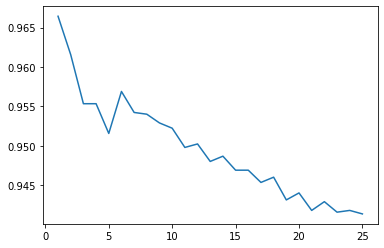

In [79]:
plt.plot(k_range,scores_list)

In [80]:
X_knn=np.array([[20,500,10,6,0,0.10,0.30,1,8]])
X_knn_std=sc.transform(X_knn)
X_knn_prediction=knn.predict(X_knn_std)
Catagory[int(dt.predict(custom_dt))]

'Employee will Leave'